In [1]:
from IPython.display import Image

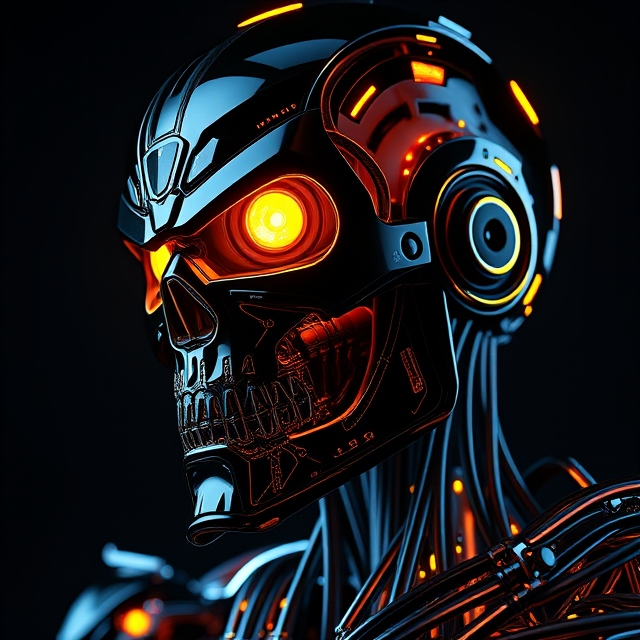

In [2]:
Image(filename = 'PyTorch-Internals.jpeg')

# PyTorch Internals

#### Author: [Kevin Thomas](mailto:ket189@pitt.edu)

# Understanding Tensor Sizes, Strides, and Offsets in PyTorch

When working with tensors in PyTorch, it's essential to understand how data is stored and accessed in memory. The three key concepts—**size**, **stride**, and **offset**—are crucial for optimizing tensor operations.

---

## 1. **Size**

The **size** of a tensor tells you the number of elements in each dimension.

### Example: Size of a Tensor

```python
import torch

tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Tensor:")
print(tensor)
print("Size:", tensor.size())  # Rows and columns
```

**Output:**

```
Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Size: torch.Size([2, 3])  # 2 rows and 3 columns
```

---

## 2. **Stride**

The **stride** tells you how many memory locations (steps) you need to skip to move to the next element in each dimension. Strides depend on the shape and layout of the tensor in memory.

### Example: Strides of a Tensor

```python
print("Stride:", tensor.stride())  # steps to move along rows and columns
```

**Output:**

```
Stride: (3, 1)
```

**Explanation**:
- To move to the next **row**, you skip 3 elements (because the row contains 3 elements).
- To move to the next **column**, you skip 1 element (because columns are adjacent in memory).

---

## 3. **Offset**

The **offset** is the starting point of the tensor in memory. PyTorch often uses **views** of the same memory to save space. The offset tells you where the tensor starts relative to the memory block.

While PyTorch abstracts offsets in most operations, advanced manipulation like slicing or reshaping can involve offsets.

---

## 4. **How Memory Works**

PyTorch stores tensors as a **1D contiguous array in memory**, regardless of their size or dimensionality. The **size** and **stride** are used to compute the memory location of each element.

### Computing Memory Location
The memory location of a tensor element is calculated as:

$ \text{Memory Location} = \text{Base Address} + \sum_{i=1}^{n} \text{index}[i] \times \text{stride}[i] $

Where:
- $\text{Base Address}$ is the starting memory location.
- $\text{index}[i]$ is the index of the element in dimension $i$.
- $\text{stride}[i]$ is the stride for dimension $i$.

---

### Example: Accessing Tensor Elements in Memory

```python
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Size:", tensor.size())
print("Stride:", tensor.stride())
```

**Output:**

```
Size: torch.Size([2, 3])  
Stride: (3, 1)
```

**Explanation**:
- Element `[0, 0]` (top-left corner): Base address + $0 \times 3 + 0 \times 1 = \text{Base address}$.
- Element `[0, 2]` (top-right corner): Base address + $0 \times 3 + 2 \times 1 = \text{Base address} + 2$.
- Element `[1, 0]` (start of the second row): Base address + $1 \times 3 + 0 \times 1 = \text{Base address} + 3$.

---

## 5. **Contiguous Tensors**

For efficient computation, PyTorch prefers **contiguous** tensors. A tensor is contiguous if:
1. Its elements are stored sequentially in memory.
2. Its stride matches the natural order of dimensions.

### Example: Contiguous Check

```python
contiguous_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Is contiguous?", contiguous_tensor.is_contiguous())

non_contiguous_tensor = contiguous_tensor.transpose(0, 1)
print("Is contiguous?", non_contiguous_tensor.is_contiguous())
```

**Output:**

```
Is contiguous? True  
Is contiguous? False
```

---

## 6. **Making a Tensor Contiguous**

If a tensor is **non-contiguous**, you can make it contiguous using the `.contiguous()` method. This creates a new tensor with the same data but rearranged in memory to ensure contiguity.

### Example: Making a Tensor Contiguous

```python
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
transposed_tensor = tensor.transpose(0, 1)  # Non-contiguous due to dimension swap
print("Is transposed tensor contiguous?", transposed_tensor.is_contiguous())

contiguous_tensor = transposed_tensor.contiguous()
print("Is the new tensor contiguous?", contiguous_tensor.is_contiguous())
```

**Output:**

```
Is transposed tensor contiguous? False  
Is the new tensor contiguous? True
```

**Explanation**:  
The `.contiguous()` method rearranges the tensor's memory layout, ensuring it is stored sequentially.

---

## 7. **Advanced Example: Manipulating Tensor Memory**

Let’s explore a more complex example where size and strides differ, and observe how memory is accessed.

### Creating a Tensor and Slicing

```python
original_tensor = torch.arange(1, 13).view(3, 4)  # Create a 3x4 tensor
print("Original Tensor:")
print(original_tensor)

sliced_tensor = original_tensor[:, ::2]  # Select every other column
print("Sliced Tensor:")
print(sliced_tensor)

print("Size of sliced tensor:", sliced_tensor.size())
print("Stride of sliced tensor:", sliced_tensor.stride())
```

**Output:**

```
Original Tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Sliced Tensor:
tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11]])

Size of sliced tensor: torch.Size([3, 2])  
Stride of sliced tensor: (4, 2)
```

**Explanation**:
- **Size**: The sliced tensor has 3 rows and 2 columns.
- **Stride**: To move to the next row, skip 4 elements (because the original tensor has 4 columns). To move to the next column in the slice, skip 2 elements (because we selected every second column).

---

## 8. **Practical Applications**

Understanding size, stride, and offsets is essential for:
1. **Memory Optimization**: Efficiently managing memory in high-dimensional computations.
2. **Data Manipulation**: Creating views, slices, and transposes without duplicating data.
3. **Performance Tuning**: Ensuring operations are performed on contiguous tensors for speed.
4. **Advanced Indexing**: Accessing and modifying specific elements using stride-based logic.

---

## Summary

PyTorch tensors are highly flexible, allowing efficient memory management through **sizes**, **strides**, and **offsets**. While size tells you the shape, strides indicate how data is stored and accessed in memory. This understanding is crucial for building efficient deep learning models and working with high-dimensional data.